# Experiment Parametrization

In [ ]:
exp_dir = './paper_results/'
exp_epoch_size = 2**16

## Import Modules

In [2]:
import math
import numpy as np
import pandas as pd

# MatPlotLib
import matplotlib.pylab as pylab
from matplotlib.patches import Rectangle
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

%matplotlib inline

pylab.rcParams['font.size'] = 24
pylab.rcParams['figure.figsize'] = [3*x for x in [3.52, 2.64]]
pylab.rcParams['figure.dpi'] = 100
pylab.rcParams['errorbar.capsize'] = 3
pylab.rcParams['legend.fontsize'] = 16
pylab.rcParams['lines.linewidth'] = 2

gridcolor = '#bbbbbb'

zvalue = 2.576  # 99%

## Load data

In [3]:
import importlib.util
spec = importlib.util.spec_from_file_location("mn", exp_dir + "/configure.py")
make_network = importlib.util.module_from_spec(spec)
spec.loader.exec_module(make_network)
exp_LBW = make_network.LBW
exp_Q_RATE = make_network.Q_RATE
exp_Q_DEPTH_FRAC = make_network.Q_DEPTH_FRAC
exp_CTH_DEPTH_FRAC = make_network.CTH_DEPTH_FRAC
exp_Q_DEPTH = make_network.Q_DEPTH
exp_CTH_DEPTH = make_network.CTH_DEPTH
exp_CTH_TIMEDELTA = make_network.CTH_TIMEDELTA

print('LBW:           ', exp_LBW, 'Mb/s')
print('Q_RATE:        ', exp_Q_RATE, 'Packets/Second')
print('Q_DEPTH:       ', exp_Q_DEPTH, 'Packets')
print('Q_DEPTH_FRAC:  ', exp_Q_DEPTH_FRAC)
print('CTH_DEPTH:     ', exp_CTH_DEPTH, 'Packets')
print('CTH_DEPTH_FRAC:', exp_CTH_DEPTH_FRAC)
print('CTH_TIMEDELTA: ', exp_CTH_TIMEDELTA, 'Microseconds')

LBW:            100 Mb/s
Q_RATE:         9000 Packets/Second
Q_DEPTH:        1125 Packets
Q_DEPTH_FRAC:   8
CTH_DEPTH:      140 Packets
CTH_DEPTH_FRAC: 8
CTH_TIMEDELTA:  15625 Microseconds


In [4]:
fns = []
flows = []
fns = ['s1-reports.csv', 's2-reports.csv', 's3-reports.csv', 's4-reports.csv', 's5-reports.csv']
flows = [
    {'id': 5, 'name': 'blue', 'color': '#0066CC', 'psrc': 1, 'pdst': 2, 'path': 'B-C'},
    {'id': 21, 'name': 'green', 'color': '#009900', 'psrc': 3, 'pdst': 4, 'path': 'E-F'},
    {'id': 13, 'name': 'teal', 'color': '#009999', 'psrc': 2, 'pdst': 4, 'path': 'D-F'},
    {'id': 13, 'name': 'orange', 'color': '#FF8000', 'psrc': 3, 'pdst': 5, 'path': 'E-G'},
    {'id': 3, 'name': 'red', 'color': '#CC0000', 'psrc': 1, 'pdst': 5, 'path': 'A-H'}
]

for fn in fns:
    tmp1 = pd.read_csv(exp_dir + '/logs/' + fn)
    tmp1['eepoch'] = tmp1['eepoch'] - tmp1['eepoch'].min() + 1 - math.floor(5e6/exp_epoch_size)
    
    for flow in flows:
        if 'reports' not in flow:
            flow['reports'] = pd.DataFrame()
        tmp2 = tmp1[(tmp1['flow'] == flow['id']) & (tmp1['psrc'] == flow['psrc']) & (tmp1['pdst'] == flow['pdst'])]
        flow['reports'] = pd.concat([flow['reports'], tmp2])

last_epoch = 0
for flow in flows:
    flow['label'] = '{} ({})'.format(flow['name'].title(), flow['path'])
    flow['reports']['epoch'] = flow['reports']['epoch'] \
                               - flow['reports']['epoch'].min() + 1 - math.floor(5e6/exp_epoch_size)
    last_epoch = max(last_epoch, flow['reports']['epoch'].max())
    flow['reports'] = flow['reports'][flow['reports']['epoch'] > 0]
    flow['reports']['ibits'] = flow['reports']['ibytes']*8
    flow['reports']['ebits'] = flow['reports']['ebytes']*8

last_epoch = math.ceil(60e6/exp_epoch_size)
print('last epoch:', last_epoch)

last epoch: 916


# Figures

## Figure 5(b) – Reports generated by IntSight for all traffic flows in the network.

### Reporting Reasons

In [5]:
for f in flows:
    reps = f['reports']
    
    reps = reps[(reps['epoch'] >= 305) & (reps['epoch'] <= 625)]
    print('#', f['name'].title())
    flg = True
    slic = reps[(reps['cps'].apply(lambda x: ('^' in x) or ('c' in x)))]
    if len(slic):
        print('Contention ({})'.format(len(slic)))
        flg = False
        display(slic)
        
    slic = reps[(reps['sps'].apply(lambda x: ('s' in x)))]
    if len(slic):
        print('Suspicion ({})'.format(len(slic)))
        flg = False
        display(slic)

    slic = reps[(reps['hds'] > 0)]
    if len(slic):
        print('High Delayed Packets ({})'.format(len(slic)))
        flg = False
        display(slic)
        
    slic = reps[(reps['drops'] > 0)]
    if len(slic):
        print('Drops ({})'.format(len(slic)))
        flg = False
        display(slic)
        
    if flg:
        print('    nothing to display\n')

# Blue
    nothing to display

# Green
Contention (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
936,463,465,21,3,4,0,2,c-,--,0,91,91,0,134771,134771,1078168,1078168
938,464,466,21,3,4,0,2,c-,--,0,84,84,0,124404,124404,995232,995232


# Teal
Contention (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
935,463,465,13,2,4,0,3,-c-,---,0,83,83,0,122923,122923,983384,983384
937,464,466,13,2,4,0,3,-c-,---,0,84,84,0,124404,124404,995232,995232


# Orange
Contention (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
936,463,465,13,3,5,0,3,c--,sss,0,440,440,0,651640,651640,5213120,5213120
938,464,466,13,3,5,0,3,c--,---,0,80,80,0,118480,118480,947840,947840


Suspicion (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
934,462,464,13,3,5,0,3,---,sss,0,428,428,0,633868,633868,5070944,5070944
936,463,465,13,3,5,0,3,c--,sss,0,440,440,0,651640,651640,5213120,5213120


# Red
Contention (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
935,464,465,3,1,5,0,5,--c--,-----,39,83,83,0,122923,122923,983384,983384
937,465,466,3,1,5,0,5,--c--,-----,19,84,84,0,124404,124404,995232,995232


High Delayed Packets (2)


,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
935,464,465,3,1,5,0,5,--c--,-----,39,83,83,0,122923,122923,983384,983384
937,465,466,3,1,5,0,5,--c--,-----,19,84,84,0,124404,124404,995232,995232


### Raw Reports

In [6]:
raw_reports = None

for f in flows:
    reps = f['reports']
    reps['flow'] =  [f['name'].title()]*len(reps)
    
    slic = reps[(reps['cps'].apply(lambda x: ('^' in x) or ('c' in x)))
                | (reps['sps'].apply(lambda x: ('s' in x)))
                | (reps['hds'] > 0)
                | (reps['drops'] > 0)]
    
    if raw_reports is None:
        raw_reports = slic
    else:
        raw_reports = pd.concat([raw_reports, slic], sort=False)
        
display(raw_reports)

,epoch,eepoch,flow,psrc,pdst,path,plen,cps,sps,hds,ipkts,epkts,drops,ibytes,ebytes,ibits,ebits
936,463,465,Green,3,4,0,2,c-,--,0,91,91,0,134771,134771,1078168,1078168
938,464,466,Green,3,4,0,2,c-,--,0,84,84,0,124404,124404,995232,995232
935,463,465,Teal,2,4,0,3,-c-,---,0,83,83,0,122923,122923,983384,983384
937,464,466,Teal,2,4,0,3,-c-,---,0,84,84,0,124404,124404,995232,995232
934,462,464,Orange,3,5,0,3,---,sss,0,428,428,0,633868,633868,5070944,5070944
936,463,465,Orange,3,5,0,3,c--,sss,0,440,440,0,651640,651640,5213120,5213120
938,464,466,Orange,3,5,0,3,c--,---,0,80,80,0,118480,118480,947840,947840
935,464,465,Red,1,5,0,5,--c--,-----,39,83,83,0,122923,122923,983384,983384
937,465,466,Red,1,5,0,5,--c--,-----,19,84,84,0,124404,124404,995232,995232


### Figure 5(b)

In [7]:
reports = pd.DataFrame(columns=('Traffic', 'Epoch', 'EgressEpoch', 'CPs', 'SPs', 'HighDelays'))

reports['Traffic'] = raw_reports['flow']
reports['Epoch'] = raw_reports['epoch']
reports['EgressEpoch'] = raw_reports['eepoch']
reports['CPs'] = raw_reports['cps']
reports['SPs'] = raw_reports['sps']
reports['HighDelays'] = raw_reports['hds']

display(reports)

reports.to_csv(exp_dir + 'fig5b.csv', index=False)

,Traffic,Epoch,EgressEpoch,CPs,SPs,HighDelays
936,Green,463,465,c-,--,0
938,Green,464,466,c-,--,0
935,Teal,463,465,-c-,---,0
937,Teal,464,466,-c-,---,0
934,Orange,462,464,---,sss,0
936,Orange,463,465,c--,sss,0
938,Orange,464,466,c--,---,0
935,Red,464,465,--c--,-----,39
937,Red,465,466,--c--,-----,19


## Figure 5(c) – Packet arrival rate for traffic being forwarded by Node N3. (Zoomed in on seconds 28 through 32 of experiment)

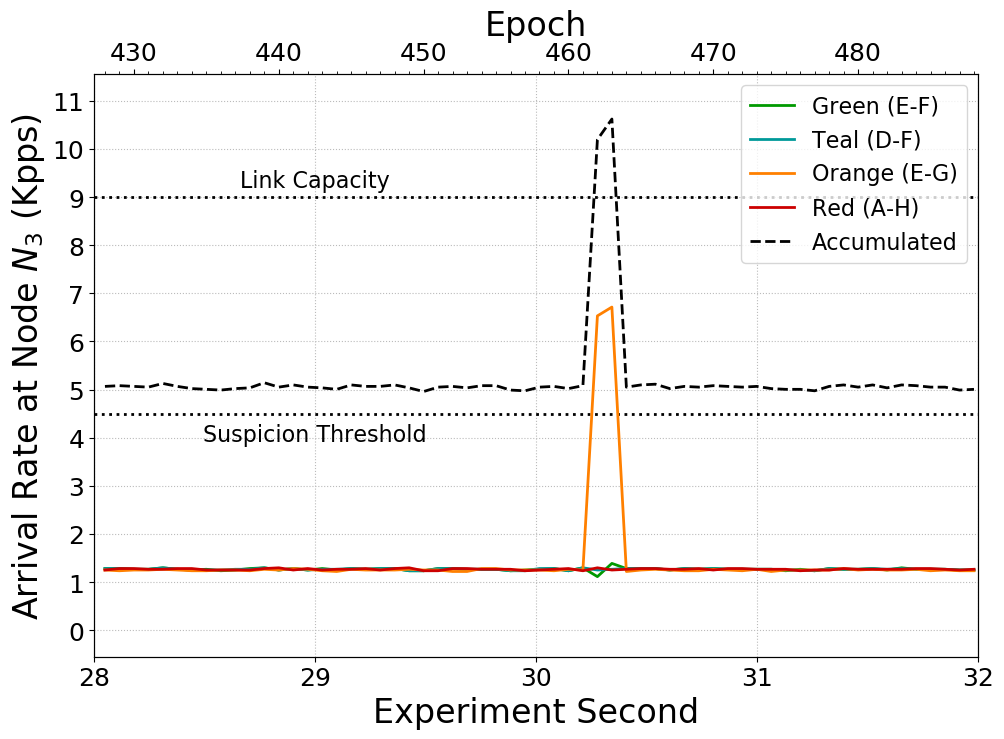

In [8]:
beg = 28
end = 32

fig = pylab.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

yacum = None
xacum = None

for flow in flows:
    if flow['name'] in ['blue']: continue
    df = flow['reports']
    df = df[(df['epoch'] >= ((beg*1e6)/exp_epoch_size)) & (df['epoch'] <= ((end*1e6)/exp_epoch_size))]
    x = df['epoch']/(1e6/exp_epoch_size)
    y = (df['ipkts']/1000)*(1e6/exp_epoch_size)
    
    ax1.plot(x, y, label=flow['label'], color=flow['color'], lw=2)
    
    if yacum is None:
        xacum = np.array(x)
        yacum = np.array(y)
    else:
        yacum = yacum + np.array(y)

ax1.plot(xacum, yacum, label='Accumulated', ls='--', lw=2, c='k')
ax1.hlines(9000/1000, beg, end, lw=2, color='k', ls=':')
ax1.text(beg + 1, 9200/1000, 'Link Capacity', size=16, horizontalalignment='center')
ax1.hlines(4500/1000, beg, end, lw=2, color='k', ls=':')
ax1.text(beg + 1, 4300/1000, 'Suspicion Threshold', size=16, horizontalalignment='center', verticalalignment='top')

ax1.set_xlabel('Experiment Second')
ax1.set_xlim(beg, end)
ax1.set_xticks(range(beg, end + 1, 1))
ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)

ax2.set_xlabel('Epoch')
ax2.set_xlim(((beg*1e6)/exp_epoch_size), ((end*1e6)/exp_epoch_size))
ax2.set_xticklabels([int(x) for x in ax2.get_xticks()], fontsize=18)
ax2.xaxis.set_minor_locator(MultipleLocator(1))

ax1.set_ylabel('Arrival Rate at Node $N_{3}$ (Kpps)')
ax1.set_ylim(-0.55, 11.55)
ax1.set_yticks(range(0, 11 + 1, 1))
ax1.set_yticklabels([int(x) for x in ax1.get_yticks()], fontsize=18)
ax1.yaxis.set_minor_locator(MultipleLocator(1))

ax1.legend(loc='upper right', ncol=1)

ax1.set_axisbelow(True)
ax1.grid(ls=':', axis='both', which='both', c=gridcolor)

pylab.tight_layout()
pylab.savefig(exp_dir + 'fig5c.pdf', transparent=True)


# Extra Figures

## Arrival Rate for Red (A–H) Traffic

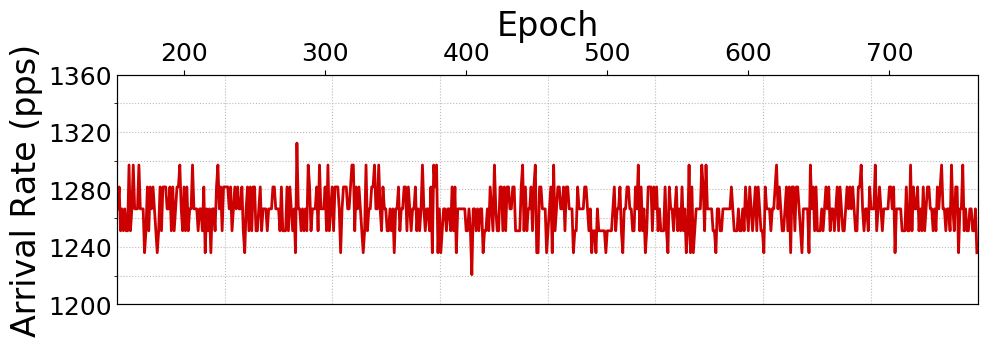

In [9]:
beg = 10
end = 50

show_acc = False
show_flows = ['red']
show_legend = False

fig = pylab.figure(figsize=[3*3.52, 1.5*2.64])
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

yacum = None
xacum = None

for flow in flows:
    if flow['name'] not in show_flows:
        continue
    df = flow['reports']
    df = df[(df['epoch'] >= ((beg*1e6)/exp_epoch_size)) & (df['epoch'] <= ((end*1e6)/exp_epoch_size))]
    x = df['epoch']/(1e6/exp_epoch_size)
    y = df['ipkts']*(1e6/exp_epoch_size)
#     ytwin = df['hds']*100/df['ipkts']
    
    ax1.plot(x, y, label=flow['label'], color=flow['color'], lw=2)
    
    if yacum is None:
        xacum = np.array(x)
        yacum = np.array(y)
    else:
        yacum = yacum + np.array(y)

if show_acc is True:
    ax1.plot(xacum, yacum, label='Accumulated', lw=1, c='k')

ax1.set_xlim(beg, end)
ax1.set_xticks(range(beg, end + 1, 5))
ax1.tick_params(length=0)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=18, color='w')

ax2.set_xlabel('Epoch')
ax2.set_xlim(((beg*1e6)/exp_epoch_size), ((end*1e6)/exp_epoch_size))
ax2.set_xticklabels([int(x) for x in ax2.get_xticks()], fontsize=18)

ax1.set_axisbelow(True)
ax1.grid(ls=':', axis='both', which='both', c=gridcolor)

ax1.set_ylabel('Arrival Rate (pps)')
ax1.set_ylim(1200, 1360)
ax1.set_yticks(range(1200, 1360 + 1, 40))
ax1.set_yticklabels([int(x) for x in ax1.get_yticks()], fontsize=18)
ax1.yaxis.set_minor_locator(MultipleLocator(20))

if show_legend is True:
    ax1.legend(loc='center')

pylab.tight_layout()
# pylab.savefig(exp_dir + 'redtraffic_rxpkts.pdf', transparent=True)


## High Delays for Red (A–H) Traffic

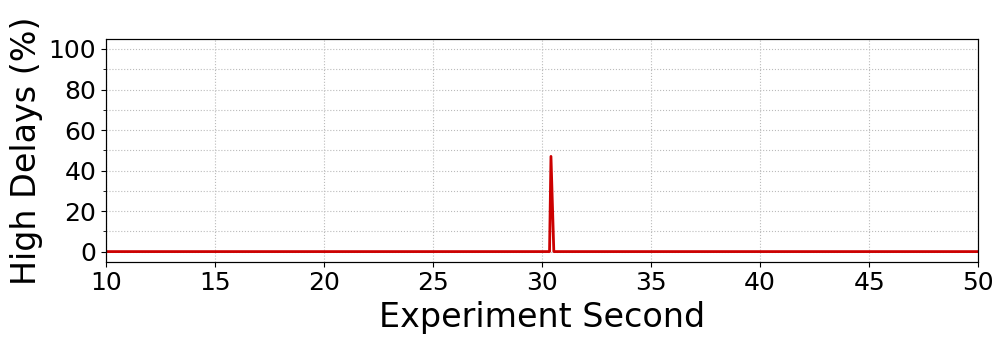

In [10]:
beg = 10
end = 50

show_acc = False
show_flows = ['red']
show_legend = False

fig = pylab.figure(figsize=[3*3.52, 1.5*2.64])
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

yacum = None
xacum = None

for flow in flows:
    if flow['name'] not in show_flows:
        continue
    df = flow['reports']
    df = df[(df['epoch'] >= ((beg*1e6)/exp_epoch_size)) & (df['epoch'] <= ((end*1e6)/exp_epoch_size))]
    x = df['epoch']/(1e6/exp_epoch_size)
    y = df['hds']*100/df['ipkts']
    
    ax1.plot(x, y, label=flow['label'], color=flow['color'], lw=2)
    
    if yacum is None:
        xacum = np.array(x)
        yacum = np.array(y)
    else:
        yacum = yacum + np.array(y)

if show_acc is True:
    ax1.plot(xacum, yacum, label='Accumulated', lw=1, c='k')

ax1.set_xlabel('Experiment Second')
ax1.set_xlim(beg, end)
ax1.set_xticks(range(beg, end + 1, 5))
ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)

ax2.set_xlim(((beg*1e6)/exp_epoch_size), ((end*1e6)/exp_epoch_size))
ax2.set_xticklabels([int(x) for x in ax2.get_xticks()], fontsize=18, color='w')
ax2.tick_params(length=0)

ax1.set_axisbelow(True)
ax1.grid(ls=':', axis='both', which='both', c=gridcolor)

ax1.set_ylabel('High Delays (%)')
ax1.set_ylim(-5, 105)
ax1.set_yticks(range(0, 100 + 1, 20))
ax1.set_yticklabels([int(x) for x in ax1.get_yticks()], fontsize=18)
ax1.yaxis.set_minor_locator(MultipleLocator(10))

if show_legend is True:
    ax1.legend(loc='center')

pylab.tight_layout()
# pylab.savefig(exp_dir + 'redtraffic_highdelays.pdf', transparent=True)


## Arrival Bitrate on Node N3 (Whole experiment)

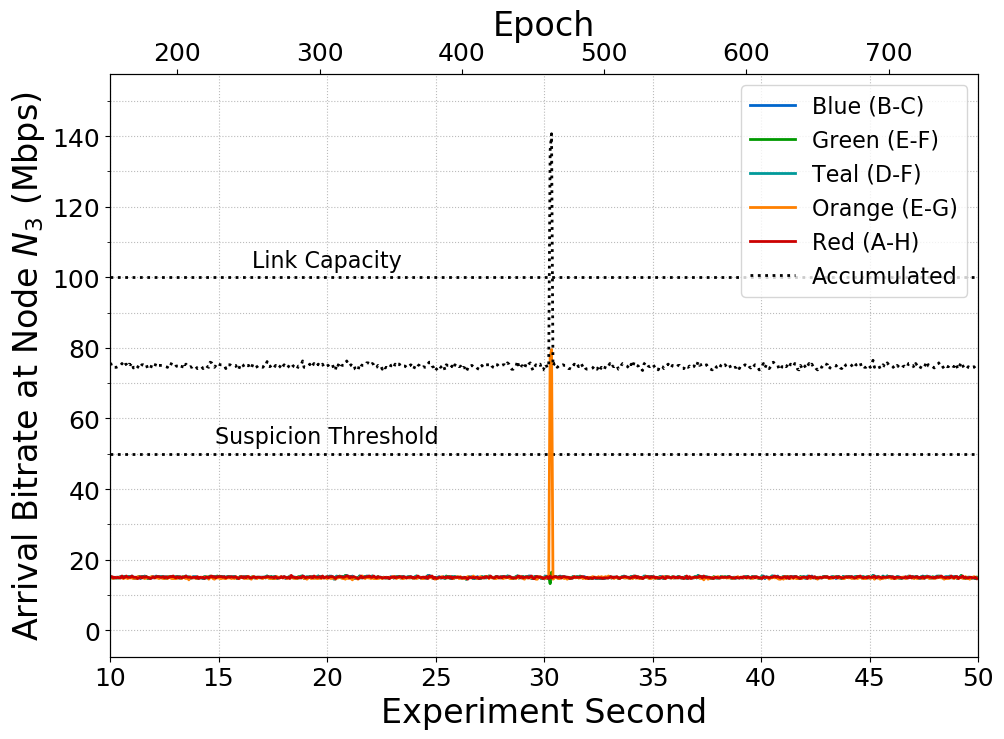

In [11]:
beg = 10
end = 50

fig = pylab.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

yacum = None
xacum = None

for flow in flows:
    df = flow['reports']
    df = df[(df['epoch'] >= ((beg*1e6)/exp_epoch_size)) & (df['epoch'] <= ((end*1e6)/exp_epoch_size))]
    x = df['epoch']/(1e6/exp_epoch_size)
    y = df['ibits']*(1/exp_epoch_size)
    
    ax1.plot(x, y, label=flow['label'], color=flow['color'], lw=2)
    
    if yacum is None:
        xacum = np.array(x)
        yacum = np.array(y)
    else:
        yacum = yacum + np.array(y)

ax1.plot(xacum, yacum, label='Accumulated', ls=':', lw=2, c='k')
ax1.hlines(100, beg, end, lw=2, color='k', ls=':')
ax1.text(beg + 10, 103, 'Link Capacity', size=16, horizontalalignment='center')
ax1.hlines(50, beg, end, lw=2, color='k', ls=':')
ax1.text(beg + 10, 53, 'Suspicion Threshold', size=16, horizontalalignment='center')

ax1.set_xlabel('Experiment Second')
ax1.set_xlim(beg, end)
ax1.set_xticks(range(beg, end + 1, 5))
ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)

ax2.set_xlabel('Epoch')
ax2.set_xlim(((beg*1e6)/exp_epoch_size), ((end*1e6)/exp_epoch_size))
ax2.set_xticklabels([int(x) for x in ax2.get_xticks()], fontsize=18)

ax1.set_axisbelow(True)
ax1.grid(ls=':', axis='both', which='both', c=gridcolor)

ax1.set_ylabel('Arrival Bitrate at Node $N_{3}$ (Mbps)')
ax1.set_ylim(-7.5, 157.5)
ax1.set_yticks(range(0, 150 + 1, 20))
ax1.set_yticklabels([int(x) for x in ax1.get_yticks()], fontsize=18)
ax1.yaxis.set_minor_locator(MultipleLocator(10))

ax1.legend(loc='upper right')

pylab.tight_layout()
# pylab.savefig(exp_dir + 'nodeN3_arrivalbitrate.pdf', transparent=True)
